# Two-way anova test

In [133]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

### 1. Define the null and alternate hypotheses

H<sub>0</sub>: <em>no diferences</em> between given data  
H<sub>1</sub>: <em>diferences</em> between given data

### 2. Define the level of confidence and significance

1 - α = 90%  
α = 10%

### 3. Select the test statistic

<em>anova</em>

### 4. Calculate the test statistic

In [98]:
data = [
  # 0
  [
    {
      'id': 'age',
      'data': [75, 65, 65, 65, 75]
    },
    {
      'id': 'cpk',
      'data': [582, 146, 160, 157, 81]
    },
    {
      'id': 'ejection_fraction',
      'data': [20, 20, 20, 65, 38]
    },
    {
      'id': 'serum_sodium',
      'data': [130, 136, 129, 137, 116]
    }
  ],
  # 1
  [
    {
      'id': 'age',
      'data': [60, 80, 62, 45, 49]
    },
    {
      'id': 'cpk',
      'data': [315, 123, 231, 981, 80]
    },
    {
      'id': 'ejection_fraction',
      'data': [60, 35, 25, 30, 30]
    },
    {
      'id': 'serum_sodium',
      'data': [132, 137, 131, 138, 133]
    }
  ]
]

In [129]:
mean_age_0                  = np.mean(data[0][0]['data'])
mean_cpk_0                  = np.mean(data[0][1]['data'])
mean_ejection_fraction_0    = np.mean(data[0][2]['data'])
mean_serum_sodium_0         = np.mean(data[0][3]['data'])

std_age_0                   = np.std(data[0][0]['data'])
std_cpk_0                   = np.std(data[0][1]['data'])
std_ejection_fraction_0     = np.std(data[0][2]['data'])
std_serum_sodium_0          = np.std(data[0][3]['data'])

var_age_0                   = std_age_0**2
var_cpk_0                   = std_cpk_0**2
var_ejection_fraction_0     = std_ejection_fraction_0**2
var_serum_sodium_0          = std_serum_sodium_0**2

mean_age_1                  = np.mean(data[1][0]['data'])
mean_cpk_1                  = np.mean(data[1][1]['data'])
mean_ejection_fraction_1    = np.mean(data[1][2]['data'])
mean_serum_sodium_1         = np.mean(data[1][3]['data'])

std_age_1                   = np.std(data[1][0]['data'])
std_cpk_1                   = np.std(data[1][1]['data'])
std_ejection_fraction_1     = np.std(data[1][2]['data'])
std_serum_sodium_1          = np.std(data[1][3]['data'])

var_age_1                   = std_age_1**2
var_cpk_1                   = std_cpk_1**2
var_ejection_fraction_1     = std_ejection_fraction_1**2
var_serum_sodium_1          = std_serum_sodium_1**2

In [176]:
n = len(data[0][0]['data'])
N = len(data[0][0]['data'])*len(data[0])*2
ni = 20
nj = 10

In [157]:
total   = []
total_0 = []
total_1 = []

for i in data:
  for j in i:
    if(data.index(i) == 0):
      total_0.extend(j['data'])
    elif(data.index(i) == 1):
      total_1.extend(j['data'])
    total.extend(j['data'])

y = np.mean(total)
y_0 = np.mean(total_0)
y_1 = np.mean(total_1)

mean_age_0_1                = np.mean([mean_age_0, mean_age_1])
mean_cpk_0_1                = np.mean([mean_cpk_0, mean_cpk_1])
mean_ejection_fraction_0_1  = np.mean([mean_ejection_fraction_0, mean_ejection_fraction_1])
mean_serum_sodium_0_1       = np.mean([mean_serum_sodium_0, mean_serum_sodium_1])

In [158]:
a = 0.1

In [171]:
ssa = ni*((y_0 - y)**2 + (y_1 - y)**2)
ssb = nj*((mean_age_0_1-y)**2 + (mean_cpk_0_1-y)**2 + (mean_ejection_fraction_0_1-y)**2 + (mean_serum_sodium_0_1-y)**2)
ssab = N*(ssa+ssb)

sse = (n-1)*(
  var_age_0 + var_cpk_0 + var_ejection_fraction_0 + var_serum_sodium_0 +
  var_age_1 + var_cpk_1 + var_ejection_fraction_1 + var_serum_sodium_1
)

sst = ssa + ssb + ssab + sse

In [182]:
lg_a = len(data)-1
lg_b = len(data[0])-1
lg_a_b = lg_a*lg_b
lg_t = N-1
lg_e = lg_t - lg_a - lg_b - lg_a_b

In [191]:
msa = ssa/lg_a
msb = ssb/lg_b
msab = ssab/lg_a_b
mse = sse/lg_e

In [208]:
fa = msa/mse
fa_critical = stats.f.isf(a, lg_a, lg_e)

fb = msb/mse
fb_critical = stats.f.isf(a, lg_b, lg_e)

fab = msab/mse
fab_critical = stats.f.isf(a, lg_a_b, lg_e)

### 5. Acceptance and rejection region

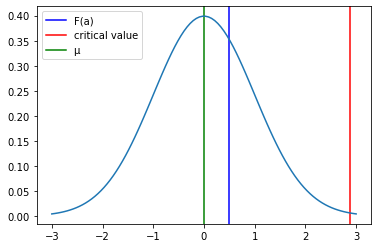

In [211]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.axvline(x=fa, color="blue")
plt.axvline(x=fa_critical, color="red")
plt.axvline(x=mu, color="green")
plt.legend(["F(a)", "critical value", "µ"])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

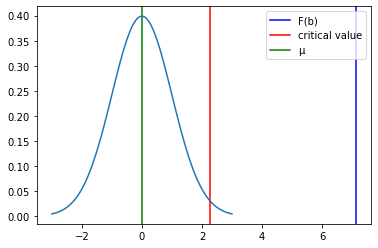

In [212]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.axvline(x=fb, color="blue")
plt.axvline(x=fb_critical, color="red")
plt.axvline(x=mu, color="green")
plt.legend(["F(b)", "critical value", "µ"])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

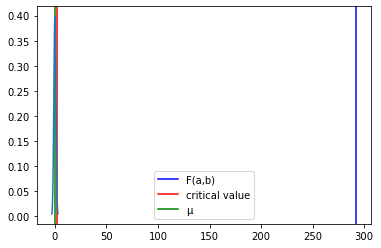

In [213]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.axvline(x=fab, color="blue")
plt.axvline(x=fab_critical, color="red")
plt.axvline(x=mu, color="green")
plt.legend(["F(a,b)", "critical value", "µ"])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### 6. Set decision rule

In [209]:
print(fa)
print(fa_critical)
print(f'Accept H0 because F(a) = {fa:.2f} < {fa_critical:.2f}')

print()

print(fb)
print(fb_critical)
print(f'Reject H0 because F(b) = {fb:.2f} > {fb_critical:.2f}')

print()

print(fab)
print(fab_critical)
print(f'Reject H0 because F(a,b) = {fab:.2f} > {fab_critical:.2f}')

0.5023891600589655
2.869259091900936
Accept H0 because F(a) = 0.50 < 2.87

7.135516386474409
2.263452515114021
Reject H0 because F(b) = 7.14 > 2.26

292.11917759309586
2.263452515114021
Reject H0 because F(a,b) = 292.12 > 2.26


### 7. Draw conclusions

In [210]:
print('Con un nivel de significancia del 90% se puede concluir que si el paciente tiene diabtes, NO influye en sus resultados.')
print('Con un nivel de significancia del 90% se puede concluir que si el paciente tiene síntomas influye en sus resultados.')
print('Con un nivel de significancia del 90% se puede concluir que que la combinacion de factores influye en sus resultados.')

Con un nivel de significancia del 90% se puede concluir que si el paciente tiene diabtes, NO influye en sus resultados.
Con un nivel de significancia del 90% se puede concluir que si el paciente tiene síntomas influye en sus resultados.
Con un nivel de significancia del 90% se puede concluir que que la combinacion de factores influye en sus resultados.
